### Import packages

In [2]:
import pandas as pd
import numpy as np
import os
import datetime

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.options.display.max_rows = 100


### Read data and describe it

In [3]:
data = pd.read_csv('data/sample_data_for_RFM.csv')
data

,client_id_main,service_lev1_hashed,service_lev2_hashed,last_trans2,arpu_monthly,cnt_trans_monthly
0,fcKVwqHCk8Kewp3CosKkwrJoZl5uX2dxb2rCm8KdwrTCn2...,1,1,2018-08-29 22:56:36.0,606.76,580.0
1,fcKVwqHClMKZwqHCnMKqwrVqY15pZWVxbGfClsKxwqbCvW...,2,2,2018-08-31 17:47:19.0,0.00,2.0
2,fcKVwqHClMKfwpvCosKswrRmZF5sZGhscWTCmsKxwqfCvW...,3,3,2018-08-31 20:42:02.0,100.81,0.0
3,fcKVwqHClMKfwp7CocKowrZjZV5qY2Rra2vClMKxwqfCvW...,2,2,2014-10-01 12:32:07.0,NaN,0.0
4,fcKVwqHClMKfwqHCoMKrwrZmZV5oY2VxcGLCmsKxwqfCvW...,4,4,2015-01-01 09:42:14.0,0.00,0.0
5,fcKVwqHClMKhwpnCo8KowrZoY15pZmdybmXCl8KxwqbCvW...,5,5,2018-08-31 23:48:14.0,1034.76,95.0
6,fcKVwqHClMKhwp7Cm8KnwrBlaV5pYWpxbGXCk8KxwqbCvW...,2,2,2018-08-30 16:43:05.0,16.00,83.0
7,fcKVwqHClcKZwp_CocKjwrBnZl5vZGhxbmbCmMKewrTCn3...,5,6,2018-08-01 12:57:12.0,15.00,0.0
8,fcKVwqHClcKdwprCoMKjwrdoZV5rZmNtbGjCmcKjwrTCn3...,5,6,2018-08-31 04:19:54.0,382.02,0.0
9,fcKVwqHClcKgwqLCocKswq9laF5pX2prcmvCmsKxwqbCvW...,5,6,2018-08-31 22:30:41.0,488.50,104.0


In [4]:
data.describe(include='all')

,client_id_main,service_lev1_hashed,service_lev2_hashed,last_trans2,arpu_monthly,cnt_trans_monthly
count,200000,200000.000000,200000.000000,199998,172080.000000,200000.000000
unique,200000,NaN,NaN,166993,NaN,NaN
top,fcKbwqbCl8KewqHCpMKnwrBiZV5wY2RtambClcKhwrTCn3...,NaN,NaN,2018-09-01 00:00:00.0,NaN,NaN
freq,1,NaN,NaN,18,NaN,NaN
mean,NaN,5.827120,10.235790,NaN,221.160003,76.116345
std,NaN,3.591114,8.465922,NaN,408.007177,161.344486
min,NaN,1.000000,1.000000,NaN,-3300.000000,0.000000
25%,NaN,5.000000,6.000000,NaN,0.000000,0.000000
50%,NaN,5.000000,6.000000,NaN,27.000000,4.000000
75%,NaN,7.000000,13.000000,NaN,327.210000,83.000000


In [5]:
#Strange 2 NaN in last_trans2. Let's remove it
data = data[~data['last_trans2'].isna()]

### Prepare data for analysis

In [6]:
data['last_trans3'] = pd.to_datetime(data['last_trans2'].str[:10], format='%Y-%m-%d')
data['days_from_last_trans'] =  ((pd.to_datetime('2018-09-01', format='%Y-%m-%d') - data['last_trans3']) / np.timedelta64(1, 'D')).astype(int)
#Let's replace NaN in arpu_monthly by zeros
data.fillna(0, inplace=True)
data

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

,client_id_main,service_lev1_hashed,service_lev2_hashed,last_trans2,arpu_monthly,cnt_trans_monthly,last_trans3,days_from_last_trans
0,fcKVwqHCk8Kewp3CosKkwrJoZl5uX2dxb2rCm8KdwrTCn2...,1,1,2018-08-29 22:56:36.0,606.76,580.0,2018-08-29,3
1,fcKVwqHClMKZwqHCnMKqwrVqY15pZWVxbGfClsKxwqbCvW...,2,2,2018-08-31 17:47:19.0,0.00,2.0,2018-08-31,1
2,fcKVwqHClMKfwpvCosKswrRmZF5sZGhscWTCmsKxwqfCvW...,3,3,2018-08-31 20:42:02.0,100.81,0.0,2018-08-31,1
3,fcKVwqHClMKfwp7CocKowrZjZV5qY2Rra2vClMKxwqfCvW...,2,2,2014-10-01 12:32:07.0,0.00,0.0,2014-10-01,1431
4,fcKVwqHClMKfwqHCoMKrwrZmZV5oY2VxcGLCmsKxwqfCvW...,4,4,2015-01-01 09:42:14.0,0.00,0.0,2015-01-01,1339
5,fcKVwqHClMKhwpnCo8KowrZoY15pZmdybmXCl8KxwqbCvW...,5,5,2018-08-31 23:48:14.0,1034.76,95.0,2018-08-31,1
6,fcKVwqHClMKhwp7Cm8KnwrBlaV5pYWpxbGXCk8KxwqbCvW...,2,2,2018-08-30 16:43:05.0,16.00,83.0,2018-08-30,2
7,fcKVwqHClcKZwp_CocKjwrBnZl5vZGhxbmbCmMKewrTCn3...,5,6,2018-08-01 12:57:12.0,15.00,0.0,2018-08-01,31
8,fcKVwqHClcKdwprCoMKjwrdoZV5rZmNtbGjCmcKjwrTCn3...,5,6,2018-08-31 04:19:54.0,382.02,0.0,2018-08-31,1
9,fcKVwqHClcKgwqLCocKswq9laF5pX2prcmvCmsKxwqbCvW...,5,6,2018-08-31 22:30:41.0,488.50,104.0,2018-08-31,1


In [7]:
data.describe(include='all')

,client_id_main,service_lev1_hashed,service_lev2_hashed,last_trans2,arpu_monthly,cnt_trans_monthly,last_trans3,days_from_last_trans
count,199998,199998.000000,199998.000000,199998,199998.000000,199998.000000,199998,199998.000000
unique,199998,NaN,NaN,166993,NaN,NaN,1780,NaN
top,fcKbwqbCl8KewqHCpMKnwrBiZV5wY2RtambClcKhwrTCn3...,NaN,NaN,2018-09-01 00:00:00.0,NaN,NaN,2018-08-30 00:00:00,NaN
freq,1,NaN,NaN,18,NaN,NaN,48462,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-13 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-01 00:00:00,NaN
mean,NaN,5.826968,10.235442,NaN,190.287969,76.117106,NaN,91.649661
std,NaN,3.590811,8.465250,NaN,386.143220,161.345114,NaN,201.624267
min,NaN,1.000000,1.000000,NaN,-3300.000000,0.000000,NaN,0.000000
25%,NaN,5.000000,6.000000,NaN,0.000000,0.000000,NaN,2.000000


Strange clients with ARPU < 0. Let's remove them

In [8]:
data = data[data['arpu_monthly'] >= 0]

Data seems ok, let's start analysis

### RFM

#### Outliers

In [9]:
data_rfm = data[['client_id_main', 'arpu_monthly', 'cnt_trans_monthly', 'days_from_last_trans']].copy()

In [10]:
data_rfm.describe(percentiles=[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])

,arpu_monthly,cnt_trans_monthly,days_from_last_trans
count,199956.000000,199956.000000,199956.000000
mean,190.392896,76.108039,91.668297
std,386.036275,161.342851,201.641333
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,1.000000
2%,0.000000,0.000000,1.000000
5%,0.000000,0.000000,1.000000
10%,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,4.000000,6.000000


At first sight we can notice next points:
* more than 50% clients didn't pay us any bills (arpu_monthly for 50% of base = 0)
* 25% clients had last transactions more than 121 days ago
* strange outliers with 5522 transactions per month and 3518 days from last transaction

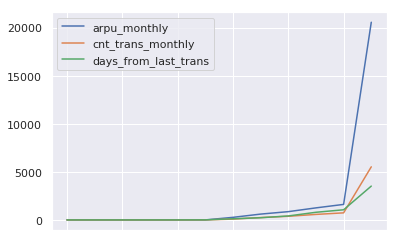

In [11]:
data_rfm.describe(percentiles=[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])[4:].plot()

Sharp rise on the right side shows that maximum values are significantly more than 99th percentile. So, we can do:
* Filter out such observations
* Replace all values which more than 99th percentile by values of 99th percentile

Each case is different, so you can apply the method which is the most relevant for you 

Here let's filter out such observations

In [12]:
data = data[(data['arpu_monthly'] <= 1613.384) 
           &(data['cnt_trans_monthly'] <= 734.45)
           &(data['days_from_last_trans'] <= 1054)]
data.shape[0]

194280

#### Segmentation

At first, let's take a look at pair plot. Maybe we can find some unique segments, like in Iris dataset.
So....

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


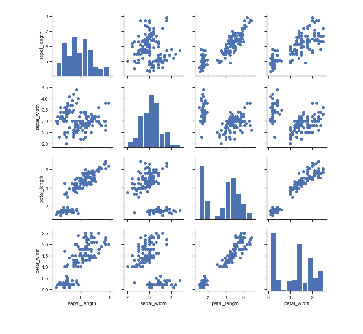

In [144]:
# Iris dataset pic
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
image = mpimg.imread('images/iris.PNG')
plt.imshow(image)
plt.grid(False)
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


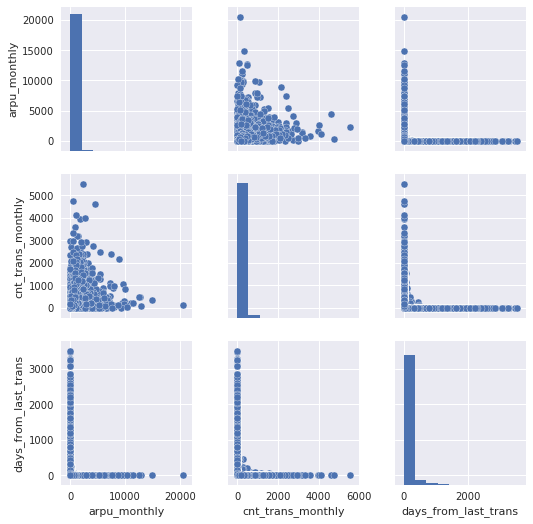

In [57]:
#our data
#there's no:
# simple clusters
# strong relationships
# and synthetic data
sns.pairplot(data=data_rfm )
plt.show()

Ooops.. In real-world data patterns are a little bit deeper, isn't it? Does it mean real-world data not such interesting? Noooo way, it's even more interesting because there is no easy insights, welcome :)

In most tutorials you'll find just division in 2,3 or 4 segments by each variable and thats all. It's not the case here. Let's see on distribution for each variable.

In [13]:
quantiles = data[[ 'arpu_monthly', 'cnt_trans_monthly', 'days_from_last_trans']].quantile(q=[0.25,0.5,0.75])
quantiles

,arpu_monthly,cnt_trans_monthly,days_from_last_trans
0.25,0.000,0.0,2.0
0.50,0.000,3.0,7.0
0.75,246.725,76.0,120.0


Seems to be a lot of 0's for arpu_monthly and more than 25% 0's of cnt_trans_monthly. So, we can't just devide in equal segments. Our goal - devide not in equal segments, but in business segments. 

Let's make next separation:
* **R** days_from_last_trans - 0 if X > 120, 1 if 7 < X <= 120,  2 if 2 < X <= 7, 3 if X <= 2
* **F** cnt_trans_monthly - 0 if X = 0, 1 if 0 < X <= 3, 2 if 3 < X <= 76, 3 if X > 76
* **M** arpu monthly - 0 if X = 0,  1 if 0 < X <= 246.725,  2 if X > 246.725

In [14]:
data['R'] = 3
data.loc[(data.days_from_last_trans <= 2), 'R'] = 3
data.loc[(data.days_from_last_trans > 2)&(data.days_from_last_trans <= 7), 'R'] = 2
data.loc[(data.days_from_last_trans > 7)&(data.days_from_last_trans <= 120), 'R'] = 1
data.loc[(data.days_from_last_trans > 120), 'R'] = 0

In [15]:
data['F'] = 0
data.loc[(data.cnt_trans_monthly > 0)&(data.cnt_trans_monthly <= 3), 'F'] = 1
data.loc[(data.cnt_trans_monthly > 3)&(data.cnt_trans_monthly <= 76), 'F'] = 2
data.loc[(data.cnt_trans_monthly > 76), 'F'] = 3

In [16]:
data['M'] = 0
data.loc[(data.arpu_monthly > 0)&(data.arpu_monthly <= 246.725), 'M'] = 1
data.loc[(data.arpu_monthly > 246.725), 'M'] = 2

In [21]:
data.groupby(['R','F','M'], as_index=False)['client_id_main'].count().sort_values(by=['client_id_main'], ascending=False)

,R,F,M,client_id_main
0,0,0,0,41029
42,3,3,2,30992
7,1,0,0,20330
38,3,2,1,13871
10,1,1,0,9875
41,3,3,1,9799
39,3,2,2,9091
13,1,2,0,7315
2,0,1,0,4438
26,2,2,1,4363


3-dimension data is not very intuitive, so let's check RF and FM segments in parallel and make some conclusions. 
I calculate count of each segment and made pivot table in Excel. You can calculate the same operations in python, if you want.  
Left table and right tables each contain 100% of clients, so you shouldn't sum numbers between them. 

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


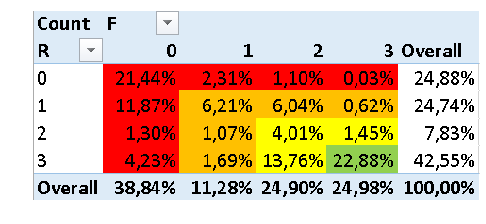

In [130]:
image = mpimg.imread('images/RF.PNG')
plt.imshow(image)
plt.grid(False)
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


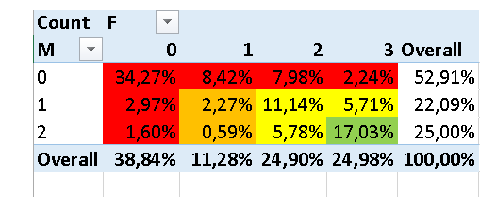

In [131]:
image = mpimg.imread('images/FM.PNG')
plt.imshow(image)
plt.grid(False)
plt.axis('off')
plt.show()

Client base can be devided into 3-4 segments (depends on business):  
* **Churn segment** - red cells in images above. Here is churn, not profitable clients and occasional buyers
* **Risky to churn segment** - orange cells, describes customers who rarely use our service, we need to understand why they don't make transactions more frequent. Interviews and different types of internet polls can be used here. 
* **Middle segment** - yellow cells, containts clients who make transactions, but they still have potential for growth, so we should develop them by campaigns
* **Loyal segment** - green cells,  out loyal client, which we should enterntain and offer the highest quality service. 

Let's apply segmentation for each customer and then calculate segment share of revenue. We suppose:  
* if customer has R=3, F=3 and M=2 then apply "Loyal customer"
* if customer has at least one 0's (zero segment) then apply "Risky client"
* Other customers let's apply to 'Middle client"

In [22]:
data['segment'] = 'Middle client'
data.loc[(data['R'] == 3)&(data['F'] == 3)&(data['M'] == 2), 'segment'] = 'Loyal customer'
data.loc[(data['R'] == 0)|(data['F'] == 0)|(data['M'] == 0), 'segment'] = 'Risky client'
data.groupby(['segment'])['arpu_monthly'].agg({'count', 'sum','mean'})

,mean,sum,count
segment,,,
Loyal customer,606.067701,18783250.18,30992
Middle client,214.161205,11038296.84,51542
Risky client,18.289386,2043765.77,111746


#### Financial analysis

from Loyal customer we take $  606
 
from Middle customer we take $  214
 
from Risky customer we take $  18

Some financial conclusions:
* Now, overall monthly revenue : 31 865 311  
* If we move client from Risky to Middle, we will increase our revenue by 196 per client (214-18). In Risky segment 111 746 clients, so it's feasibly to increase revenue by 111 746 * 196 =  21 902 216 
* If we develop customer from Middle to Loyal, that will give us 392 per client revenue (606-214). In Middle segment 51542 clients, so potentially they can bring us 51 542 * 196 = 20 204 464


### Results

Finally, let's take a lot what tasks are covered by this notebook:
* Descriptive analysis
* Clearing the data
* Identifying outliers
* RFM segmentation
* Grouping segments in business interpretated classes
* Calculate simple financial KPI's like ARPU per segment, potential revenue

RFM analysis - is a simple type of analysis, you can do it in 1-3 days, but it will give you first insights and understanding of your business goals and possibilities.